In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns
import numpy as np

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 100)

# Dataframe of image paths and labels

In [2]:
# Root path to data on local machine
rootDir = '/Users/josephking/Documents/sponsored_projects/MERGEN/data/vehicle_classifier/scraped_images'

In [3]:
lst = []
for subdir, dirs, files in os.walk(rootDir):
    for file in [i for i in files if 'jpg' in i or 'png' in i]:
        lst.append('/'.join(os.path.join(subdir, file).split('/')[-4:]))  # does not count empty subdirectories
df = pd.DataFrame(lst, columns=["Source Path"])
df['Make'] = df['Source Path'].apply(lambda x: x.split('/')[0])
df['Model'] = df['Source Path'].apply(lambda x: x.split('/')[1])
df['Year'] = df['Source Path'].apply(lambda x: x.split('/')[2]).astype(int)

# Fixes to account for Chevrolet C/K and RAM C/V
df.loc[(df.Make == 'Chevrolet') & (df.Model == 'C:K'), 'Model'] = 'C/K'
df.loc[(df.Make == 'RAM') & (df.Model == 'C:V'), 'Model'] = 'C/V'

df = df[['Make', 'Model', 'Year', 'Source Path']].sort_values(['Make', 'Model', 'Year']).reset_index(drop=True)

In [4]:
df.head()

,Make,Model,Year,Source Path
0,Acura,CL,2001,Acura/CL/2001/f04ed53e11.jpg
1,Acura,CL,2001,Acura/CL/2001/6084dddd71.jpg
2,Acura,CL,2001,Acura/CL/2001/723a443ab2.jpg
3,Acura,CL,2001,Acura/CL/2001/cb6d1e23cb.jpg
4,Acura,CL,2001,Acura/CL/2001/ede0361fca.jpg


In [5]:
print("Number of scraped images: {:,}".format(len(df)))

Number of scraped images: 664,678


# Verify all make-model classes present

In [6]:
db = pd.read_csv('../data/make_model_database_mod.csv')

In [7]:
merged = db[['Make', 'Model']].drop_duplicates().merge(df[['Make', 'Model']].drop_duplicates(), indicator=True)

In [8]:
assert((merged._merge == 'both').all())

In [9]:
print(f"Number of unique make-models: {len(merged)}")

Number of unique make-models: 574


# Images per make-model class

In [10]:
make_model = pd.DataFrame((df['Make'] + ' ' + df['Model']), columns=['Make_Model'])
make_model['Count'] = 1
make_model = make_model.groupby('Make_Model')['Count'].count().reset_index()

### Statistical moments

In [11]:
make_model['Count'].describe()

count      574.000000
mean      1157.975610
std       1247.126435
min         90.000000
25%        370.750000
50%        748.000000
75%       1478.750000
max      11210.000000
Name: Count, dtype: float64

### Kernel density

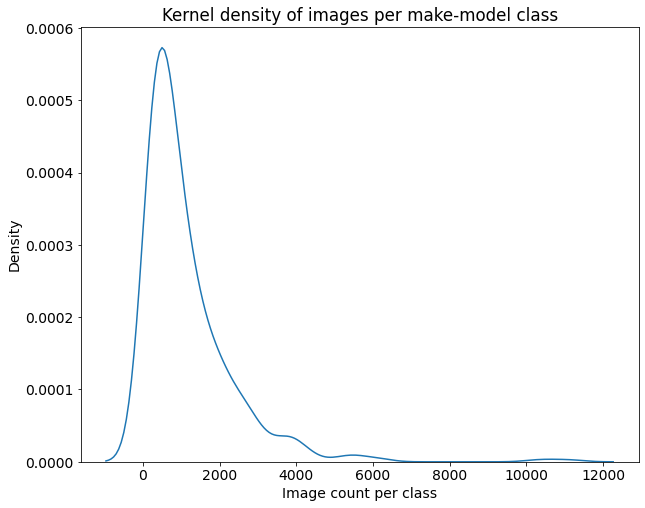

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.set_facecolor('white')
sns.kdeplot(make_model['Count'])
plt.xlabel('Image count per class')
plt.title('Kernel density of images per make-model class')
plt.savefig('../figs/kdeplot_imgs_per_class.png', dpi=200)
plt.show()

### Most and least 25 populous classes

In [13]:
mm = make_model.sort_values(by=['Count'], ascending=False)
n = 25
most_least = pd.concat([mm.iloc[:n], mm.iloc[-n:]], axis=0)

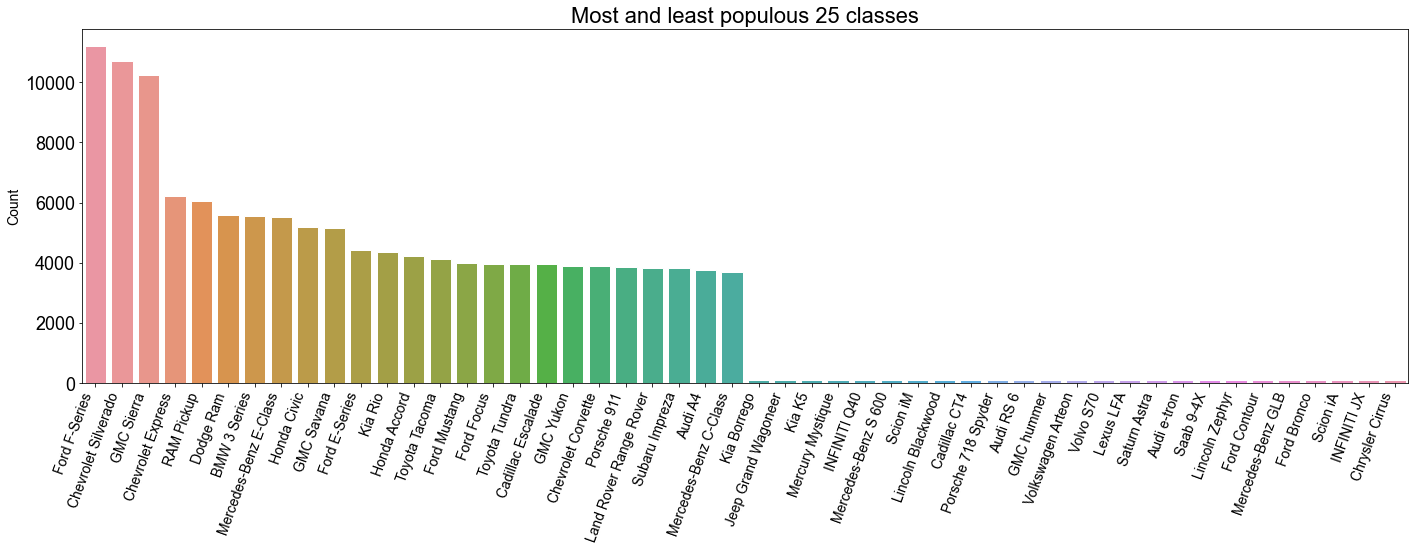

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
fig.set_facecolor('white')
sns.set(font_scale=1.5)
sns.barplot(data=most_least, y='Count', x='Make_Model')
plt.xticks(rotation=70, ha='right')
plt.yticks(fontsize=18)
plt.xlabel(None)
plt.title('Most and least populous 25 classes', fontsize=22)
plt.tight_layout()
plt.savefig('../figs/most_least_pop_classes.png', dpi=200)
plt.show()

### Image count per class

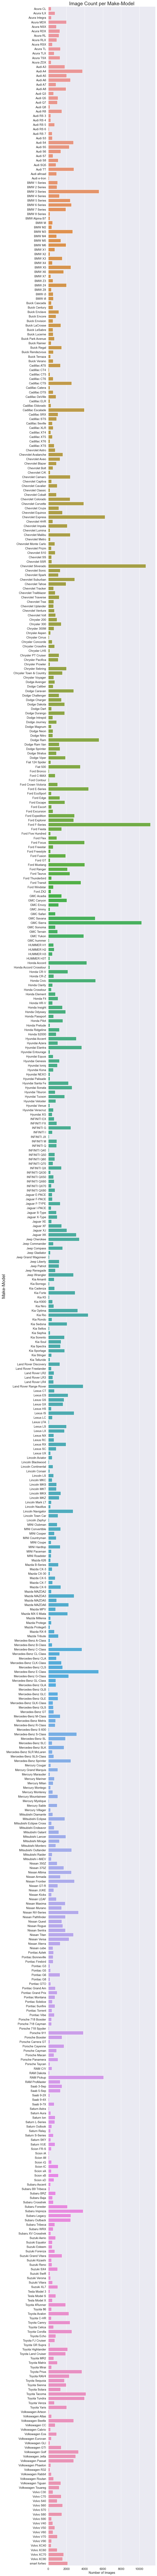

In [15]:
figure(figsize=(10, 160), dpi=80)
sns.set(font_scale=1.2)
sns.barplot(data=make_model, x='Count', y='Make_Model')
plt.xlabel("Number of Images")
plt.ylabel("Make-Model", fontsize=20)
plt.title("Image Count per Make-Model", fontsize=22)
plt.tight_layout()
plt.savefig('../figs/img_count_per_class.png', dpi=200)
plt.show()